In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [6]:
# unzip the downloaded dataset

!unzip /content/Own-Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Own-Dataset/Tumor/P_629_RO_.jpg  
  inflating: Own-Dataset/Tumor/P_629_SP_.jpg  
  inflating: Own-Dataset/Tumor/P_629_VF_.jpg  
  inflating: Own-Dataset/Tumor/P_62_BR_.jpg  
  inflating: Own-Dataset/Tumor/P_62_DA_.jpg  
  inflating: Own-Dataset/Tumor/P_62_HF_.jpg  
  inflating: Own-Dataset/Tumor/P_62_RO_.jpg  
  inflating: Own-Dataset/Tumor/P_62_SP_.jpg  
  inflating: Own-Dataset/Tumor/P_62_VF_.jpg  
  inflating: Own-Dataset/Tumor/P_63.jpg  
  inflating: Own-Dataset/Tumor/P_630.jpg  
  inflating: Own-Dataset/Tumor/P_630_BR_.jpg  
  inflating: Own-Dataset/Tumor/P_630_DA_.jpg  
  inflating: Own-Dataset/Tumor/P_630_HF_.jpg  
  inflating: Own-Dataset/Tumor/P_630_RO_.jpg  
  inflating: Own-Dataset/Tumor/P_630_SP_.jpg  
  inflating: Own-Dataset/Tumor/P_630_VF_.jpg  
  inflating: Own-Dataset/Tumor/P_631.jpg  
  inflating: Own-Dataset/Tumor/P_631_BR_.jpg  
  inflating: Own-Dataset/Tumor/P_631_DA_.jpg  
  inflating: Own-Dataset/Tum

In [7]:
# count the number of images in the respective classes
# 1- Tumor
# 2- No Tumor (Normal)

# first creating the directory
ROOT_DIR = "/content/Own-Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [8]:
#counting number of images
number_of_images.items()

dict_items([('Normal', 6866), ('Tumor', 21807)])

In [9]:
len(os.listdir("/content/Own-Dataset"))

2

We will split the data such that
1.   80% for Train data
2.   10% for validation
3.   10% for testing





In [10]:
# we will create the train, validation, testing datasets folder using function

def dataFolder(folderName, split):
  if not os.path.exists("./" +folderName):
    os.mkdir("./" +folderName)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" +folderName+"/" + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace=False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./" +folderName, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{folderName} folder already exist")

In [11]:
dataFolder("train", 0.8)

In [12]:
dataFolder("validation", 0.1)

In [13]:
dataFolder("test", 0.1)

In [14]:
# this code will shows that how many images are left after train, validation, test

number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Normal', 17), ('Tumor', 17)])

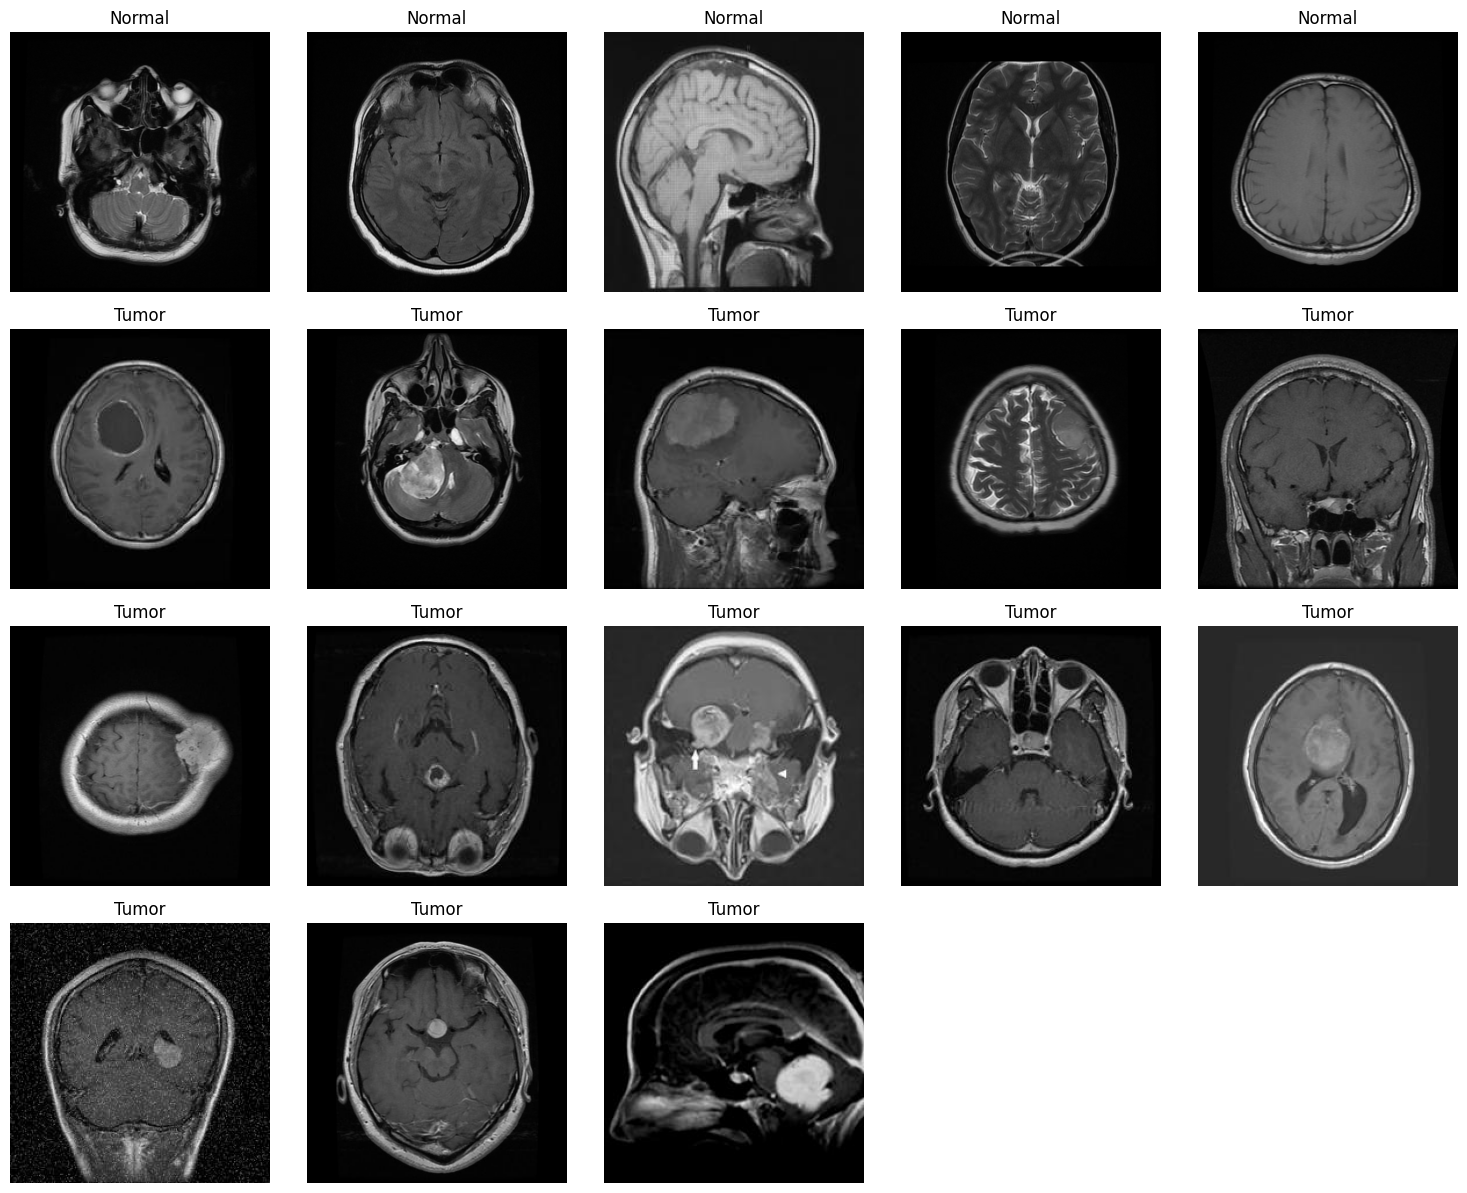

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def plot_images(dataset_path, categories, num_images_per_category=5):
    """
    Plot a specified number of images for each category (e.g., Normal, Tumor), ensuring 5 columns per row.

    Parameters:
        dataset_path (str): Path to the dataset directory.
        categories (list): List of category folder names (e.g., ['Normal', 'Tumor']).
        num_images_per_category (int): Number of images to display per category.
    """
    columns = 5
    rows = 5  # Total of 25 images
    total_images = rows * columns
    num_categories = len(categories)

    # Adjust the number of images per category if the total doesn't add up to 25
    images_per_category = total_images // num_categories
    if total_images % num_categories != 0:
        images_per_category += 1

    plt.figure(figsize=(15, rows * 3))

    for category_index, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)

        # Randomly select images to display
        selected_images = random.sample(images, min(images_per_category, len(images)))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

            # Plot the image
            plt.subplot(rows, columns, category_index * columns + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

# Specify dataset path and categories
dataset_path = "/content/train"  # Replace with the path to your dataset
categories = ["Normal", "Tumor"]

# Plot images
plot_images(dataset_path, categories, num_images_per_category=5)


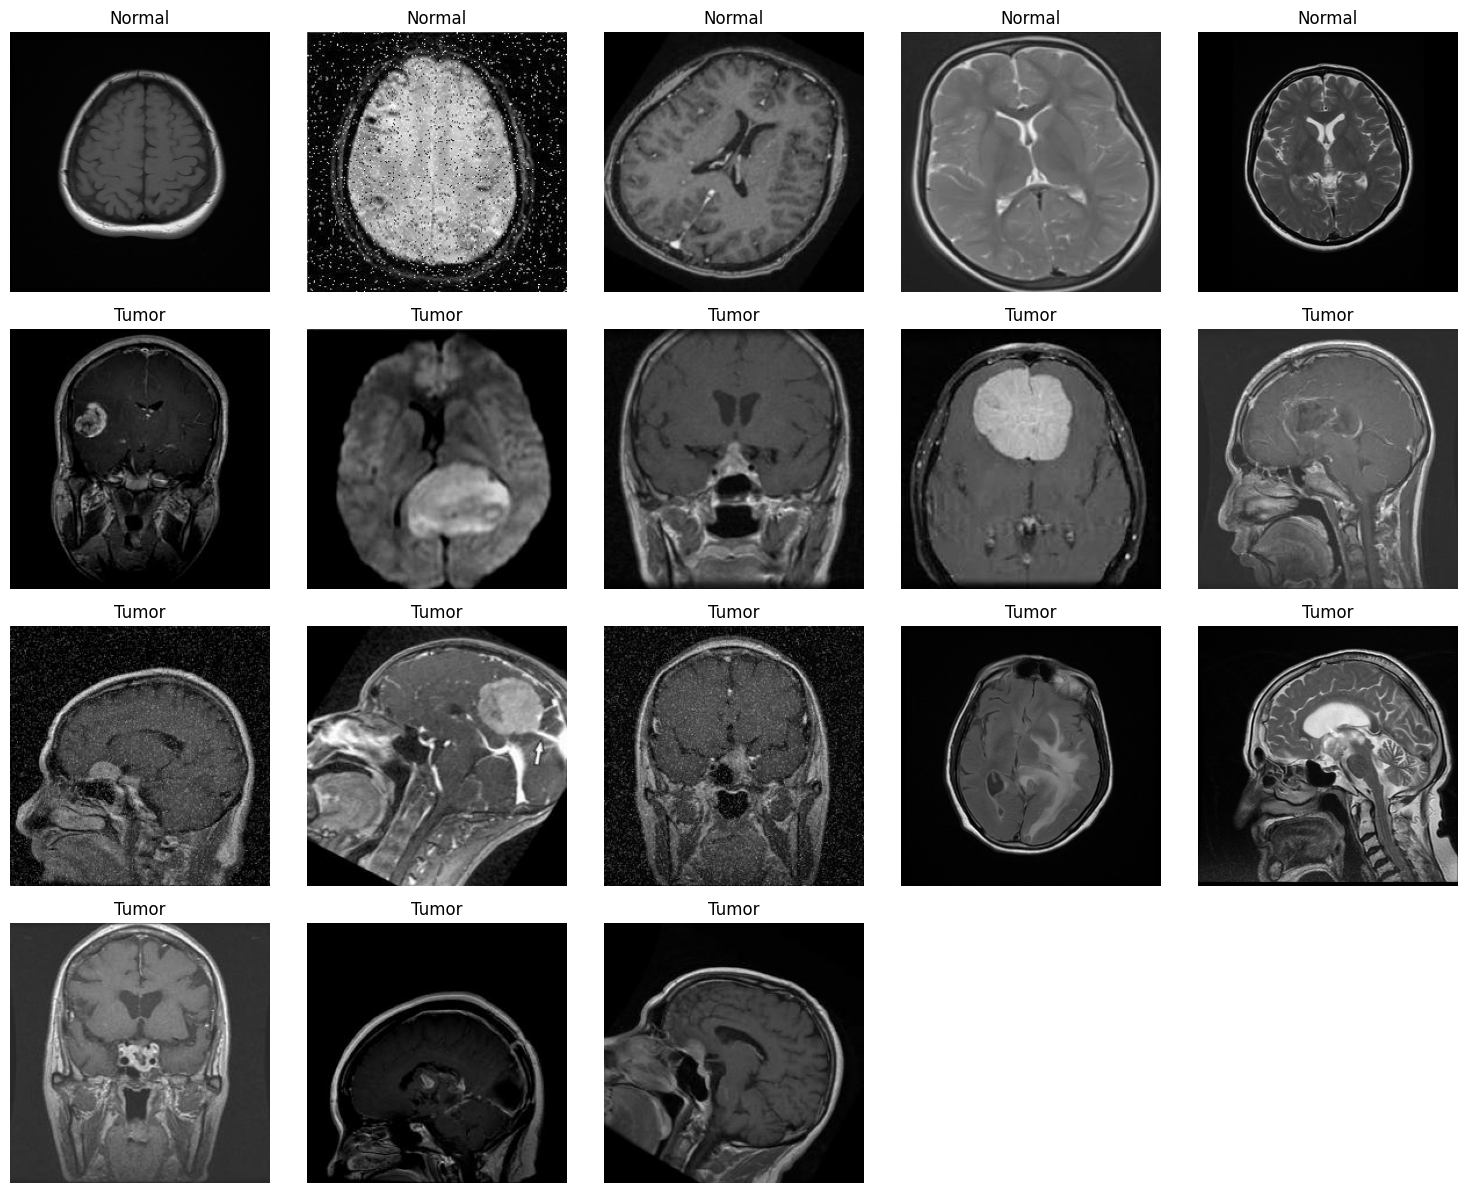

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def plot_images(dataset_path, categories, num_images_per_category=5):
    """
    Plot a specified number of images for each category (e.g., Normal, Tumor), ensuring 5 columns per row.

    Parameters:
        dataset_path (str): Path to the dataset directory.
        categories (list): List of category folder names (e.g., ['Normal', 'Tumor']).
        num_images_per_category (int): Number of images to display per category.
    """
    columns = 5
    rows = 5  # Total of 25 images
    total_images = rows * columns
    num_categories = len(categories)

    # Adjust the number of images per category if the total doesn't add up to 25
    images_per_category = total_images // num_categories
    if total_images % num_categories != 0:
        images_per_category += 1

    plt.figure(figsize=(15, rows * 3))

    for category_index, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)

        # Randomly select images to display
        selected_images = random.sample(images, min(images_per_category, len(images)))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

            # Plot the image
            plt.subplot(rows, columns, category_index * columns + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

# Specify dataset path and categories
dataset_path = "/content/test"  # Replace with the path to your dataset
categories = ["Normal", "Tumor"]

# Plot images
plot_images(dataset_path, categories, num_images_per_category=5)


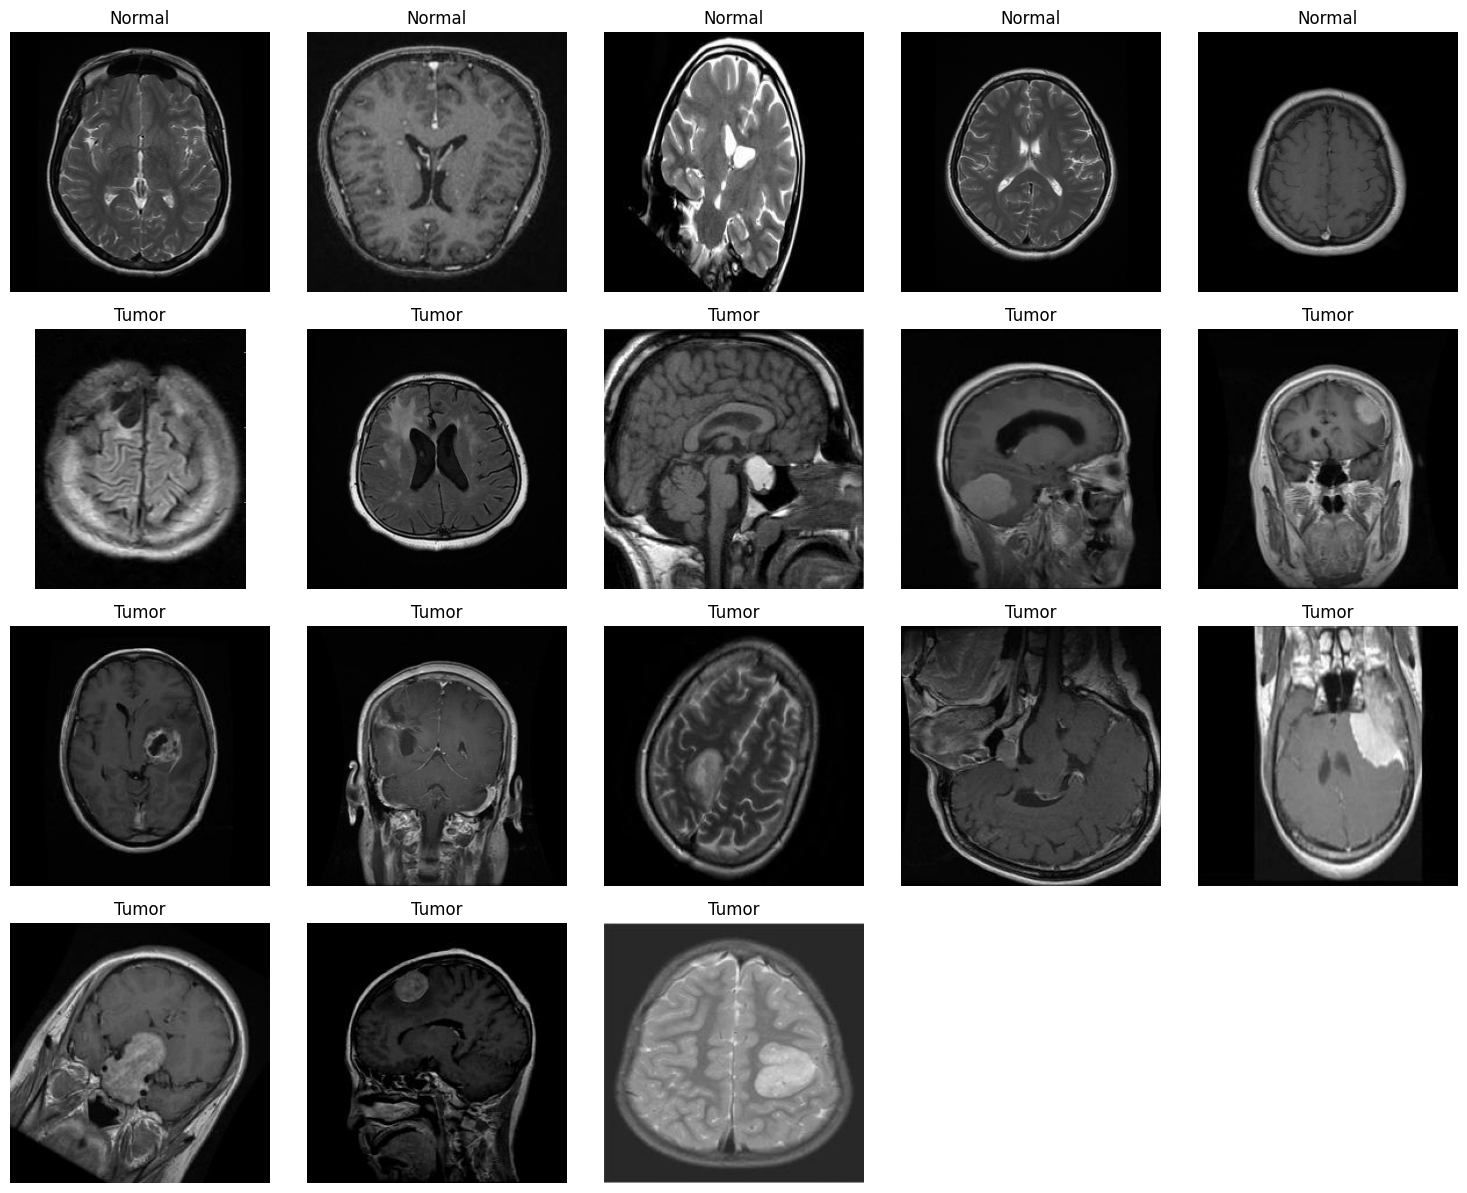

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def plot_images(dataset_path, categories, num_images_per_category=5):
    """
    Plot a specified number of images for each category (e.g., Normal, Tumor), ensuring 5 columns per row.

    Parameters:
        dataset_path (str): Path to the dataset directory.
        categories (list): List of category folder names (e.g., ['Normal', 'Tumor']).
        num_images_per_category (int): Number of images to display per category.
    """
    columns = 5
    rows = 5  # Total of 25 images
    total_images = rows * columns
    num_categories = len(categories)

    # Adjust the number of images per category if the total doesn't add up to 25
    images_per_category = total_images // num_categories
    if total_images % num_categories != 0:
        images_per_category += 1

    plt.figure(figsize=(15, rows * 3))

    for category_index, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)

        # Randomly select images to display
        selected_images = random.sample(images, min(images_per_category, len(images)))

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

            # Plot the image
            plt.subplot(rows, columns, category_index * columns + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

# Specify dataset path and categories
dataset_path = "/content/validation"  # Replace with the path to your dataset
categories = ["Normal", "Tumor"]

# Plot images
plot_images(dataset_path, categories, num_images_per_category=5)


**Model Building**

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# CNN Model

model = Sequential()

#different layers of data filtering

#layers apply convolutional filters to extract features from the input data.

# first convolutional layer and input layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224,224,3)))

# second convolutional layer
model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))

# First Max Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#third convolutional layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# second max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# fourth convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# third max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# dropout layer to prevent overfitting
model.add(Dropout(rate = 0.25))

#Converts the 3D feature maps (from convolutional layers) into a 1D vector so they can be passed to fully connected layers.
model.add(Flatten())

#These layers combine the features extracted by the convolutional layers to make predictions.
model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate = 0.25))

#These layers combine the features extracted by the convolutional layers to make predictions.
model.add(Dense(units=1, activation='sigmoid'))

#overview of the model, including details about the layers, their output shapes, the number of parameters, and the total number of trainable parameters in the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import keras

In [18]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

Preparing our data using Data Generator

In [19]:
# training data
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """

  # data augmentation and preprocessing
  image_data = ImageDataGenerator(zoom_range=0.2,
                                  shear_range=0.2,
                                  rescale = 1/255,
                                  horizontal_flip=True)   #data augmentation


  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [20]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 22925 images belonging to 2 classes.


In [21]:
train_data.class_indices

{'Normal': 0, 'Tumor': 1}

In [22]:
#testing data
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [23]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 2856 images belonging to 2 classes.


In [24]:
path = "/content/validation"
validate_data = preprocessingImages2(path)

Found 2856 images belonging to 2 classes.


In [25]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience=10, verbose=1, mode='auto')

# model checkpoint
mc = ModelCheckpoint(monitor = "val_accuracy", filepath="./bestmodel.keras", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es,mc]

**Model Training**

In [26]:
hs = model.fit(train_data,
                         steps_per_epoch=30,
                         epochs=30,
                         verbose=1,
                         validation_data = validate_data,
                         validation_steps = 16,
                         callbacks = cd)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.7275 - loss: 0.7225
Epoch 1: val_accuracy improved from -inf to 0.77148, saving model to ./bestmodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 500ms/step - accuracy: 0.7289 - loss: 0.7202 - val_accuracy: 0.7715 - val_loss: 0.5443
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.7652 - loss: 0.5549
Epoch 2: val_accuracy did not improve from 0.77148
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 634ms/step - accuracy: 0.7653 - loss: 0.5547 - val_accuracy: 0.7715 - val_loss: 0.5245
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7706 - loss: 0.5414
Epoch 3: val_accuracy improved from 0.77148 to 0.77539, saving model to ./bestmodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 405ms/step - accuracy: 0.7701 - loss: 0.5419 - val_accuracy: 0.7754 - val_loss: 0.4969
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7685 - loss: 0.5135
Epoch 4: val_accuracy did not improve from 0.77539
30/30 ━━━━━━━━━━━━━━━━━

In [27]:
# load the best model that you trained
from tensorflow.keras.models import load_model
model = load_model("/content/bestmodel.keras")

# check the accuracy of model
acc = model.evaluate(test_data)[1]
print(f"The accuracy of model is {acc*100} %")

90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8775 - loss: 0.3502
The accuracy of model is 88.0602240562439 %


**Training the model with the help of pretrained model to increase the accuracy. This will only work if we already train the above model and the retrain using the the following steps**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import MobileNet


base_model = MobileNet(input_shape=(224,224,3), include_top = False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
for layer in base_model.layers:
  layer.trainable= False

In [30]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation = 'sigmoid')(X)


model = Model(base_model.input, X)

In [31]:
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [32]:
model.compile(optimizer = 'rmsprop', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

In [33]:
## Call back


from keras.callbacks import ModelCheckpoint, EarlyStopping

## model checkpoint
mc = ModelCheckpoint(filepath = '/content/bestmodel.keras', monitor = 'val_accuracy', verbose = 1, save_best_only= True)

## Early Stopping
es = EarlyStopping(monitor="val_accuracy", restore_best_weights=True, min_delta = 0.01, patience= 10, verbose =1)

cb = [mc,es]

In [34]:
hist = model.fit(train_data,
                           steps_per_epoch=30,
                           epochs=15,
                           validation_data= validate_data,
                           validation_steps= 16,
                           callbacks = cb)
                    ## patience = 10 , verbose = 1

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7460 - loss: 4.7390
Epoch 1: val_accuracy improved from -inf to 0.88086, saving model to /content/bestmodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.7477 - loss: 4.6792 - val_accuracy: 0.8809 - val_loss: 0.6690
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8309 - loss: 1.5913
Epoch 2: val_accuracy improved from 0.88086 to 0.90430, saving model to /content/bestmodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 422ms/step - accuracy: 0.8316 - loss: 1.5815 - val_accuracy: 0.9043 - val_loss: 0.4693
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8560 - loss: 1.2299
Epoch 3: val_accuracy improved from 0.90430 to 0.90820, saving model to /content/bestmodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.8561 - loss: 1.2343 - val_accuracy: 0.9082 - val_loss: 0.5332
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.9103 - loss: 0.8090
Epoch 4: val_a

In [35]:
# load the best model that you trained
model = load_model("/content/bestmodel.keras")

# check the accuracy of model
acc = model.evaluate(test_data)[1]
print(f"our model's accuracy is {acc*100} %")

90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9532 - loss: 0.3326
our model's accuracy is 96.00840210914612 %


**Below part common in both mdoel**

In [36]:
# Model Graphical Interpretation

h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

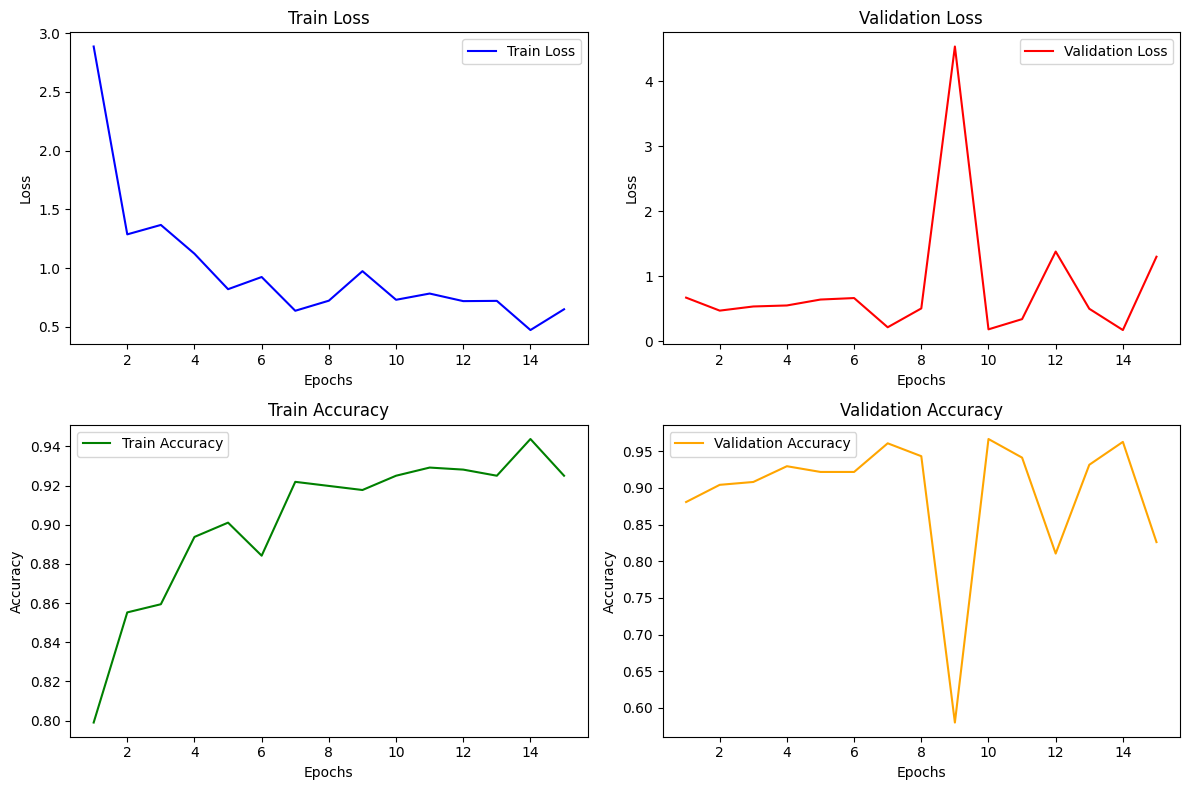

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from the history object
epochs = np.arange(1, len(hist.history['loss']) + 1)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Define number of rows and columns in the grid
rows = 2
cols = 2

# Create a figure and set of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Plot on each subplot with different parameters
# Plot 1: Train loss vs Epochs
axes[0, 0].plot(epochs, train_loss, label='Train Loss', color='blue')
axes[0, 0].set_title('Train Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Plot 2: Validation loss vs Epochs
axes[0, 1].plot(epochs, val_loss, label='Validation Loss', color='red')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Plot 3: Train accuracy vs Epochs
axes[1, 0].plot(epochs, train_acc, label='Train Accuracy', color='green')
axes[1, 0].set_title('Train Accuracy')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot 4: Validation accuracy vs Epochs
axes[1, 1].plot(epochs, val_acc, label='Validation Accuracy', color='orange')
axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


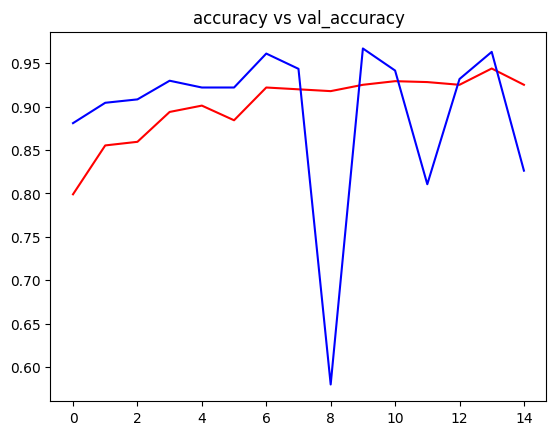

In [38]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'], c="red")
plt.plot(h['val_accuracy'], c="blue")

plt.title("accuracy vs val_accuracy")
plt.show()


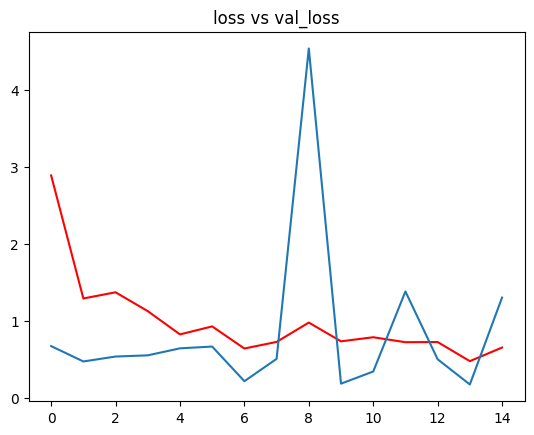

In [39]:
import matplotlib.pyplot as plt

plt.plot(h['loss'], c="red")
plt.plot(h['val_loss'])

plt.title("loss vs val_loss")
plt.show()

**To know the class of tumor is 0 or 1**

In [40]:
train_data.class_indices

{'Normal': 0, 'Tumor': 1}

**Result prediction of our model**

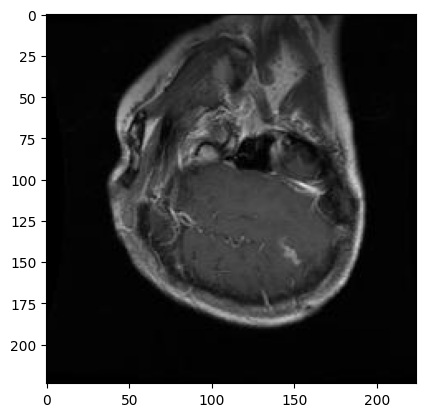

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The MRI is having brain tumor or Tumor MRI


In [42]:
from keras.preprocessing.image import load_img, img_to_array

# load and preprocess the image
path = "/content/validation/Tumor/G_107_VF_.jpg"
img = load_img(path, target_size = (224,224)) #resize to match model input size

input_arr = img_to_array(img)/ 255.0 # Normalize pixel value to [0,1]


# Display the image
plt.imshow(input_arr)

#plt.axis('off')   #hide axis for better visualisation
plt.show()

input_arr.shape # Input shape (before adding batch dimesnsion)

# Expand dimensions to match the batch input format
input_arr = np.expand_dims(input_arr, axis = 0)

# Make the prediction
pred = (model.predict(input_arr) > 0.5)[0][0]
# pred = np.argmax(model.predict(input_arr), axis=1)[0]
pred


if pred == 0:
  print("The MRI is not having brain tumor or Normal MRI")
else:
  print("The MRI is having brain tumor or Tumor MRI")

In [43]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [44]:
import torch
import torch.nn as nn
from torchviz import make_dot

# Assuming SelfONN2dLayer is defined
class SelfONN2dLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, q):
        super(SelfONN2dLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, padding=1)
    def forward(self, x):
        return self.conv(x)

# Model definition
class TumorONNModel(nn.Module):
    def __init__(self):
        super(TumorONNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Tanh(),
            SelfONN2dLayer(3, 16, kernel_size=3, q=3),
            nn.MaxPool2d(2, 2),
            SelfONN2dLayer(16, 32, kernel_size=3, q=3),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(32 * 14 * 14, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Create the model and dummy input
model = TumorONNModel()
dummy_input = torch.randn(1, 3, 56, 56)  # Example input size
output = model(dummy_input)

# Visualize the computational graph
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render('tumor_onn_model', format='svg', cleanup=True)


'tumor_onn_model.svg'

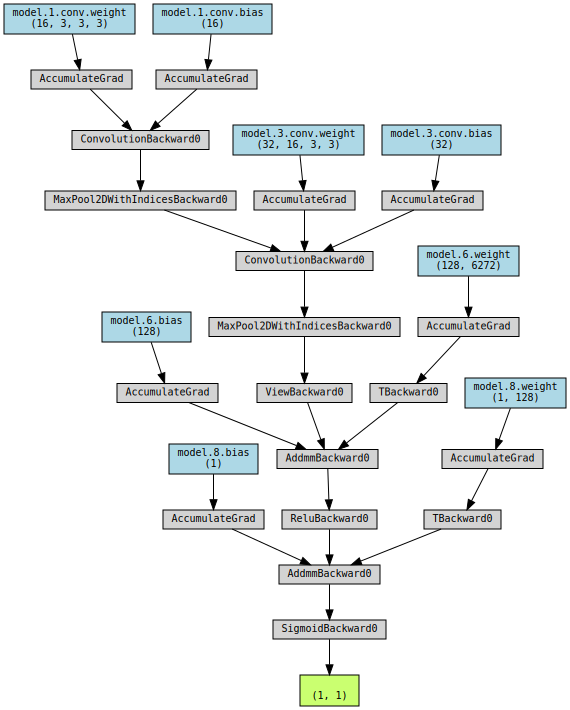

In [45]:
from IPython.display import SVG, display

# Load and display the SVG file
display(SVG('tumor_onn_model.svg'))